# Plotting Groundwater Data

This notebook plots example datapoints from [https://doi.org/10.25919/skw8-yx65](https://doi.org/10.25919/skw8-yx65).

In [1]:
import sys
import os
import numpy as np
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.insert(0, os.path.abspath('../model_and_training_fns/'))
from dataloader import GW_DataSet, make_dataloader

## Loading in Groundwater Data

In [2]:
train_dataset = GW_DataSet(os.path.join('..', '..', 'NPYdata', 'train'))
dataloader = make_dataloader(train_dataset, 1, 100)
iterable_data = iter(dataloader)

Run following cell to get new datapoint

In [59]:
data = next(iterable_data)

In [60]:
data.keys()

dict_keys(['PET_scaled', 'precip_scaled', 'GW_depth', 'year_scaled', 'DEM_scaled', 'coordinates_scaled'])

## Check Each Field in the Data Makes Sense

### PET Scaled

*This is an R array object with four dimensions (number of observations, 12, 9, 9). The values in the array are normalised potential evapo-transpiration for a 9 x 9 patch of pixels over the preceding 12 months, and centred around the groundwater observation. Each pixel is 1500m x 1500m. We can basically think of this as a tensor containing 9x9 pixel images with 12 channels.*

In [61]:
print(data['PET_scaled'].shape)

torch.Size([1, 12, 9, 9])


Minimum data value: 0.1778443455696106
Maximum data value: 0.8755845427513123


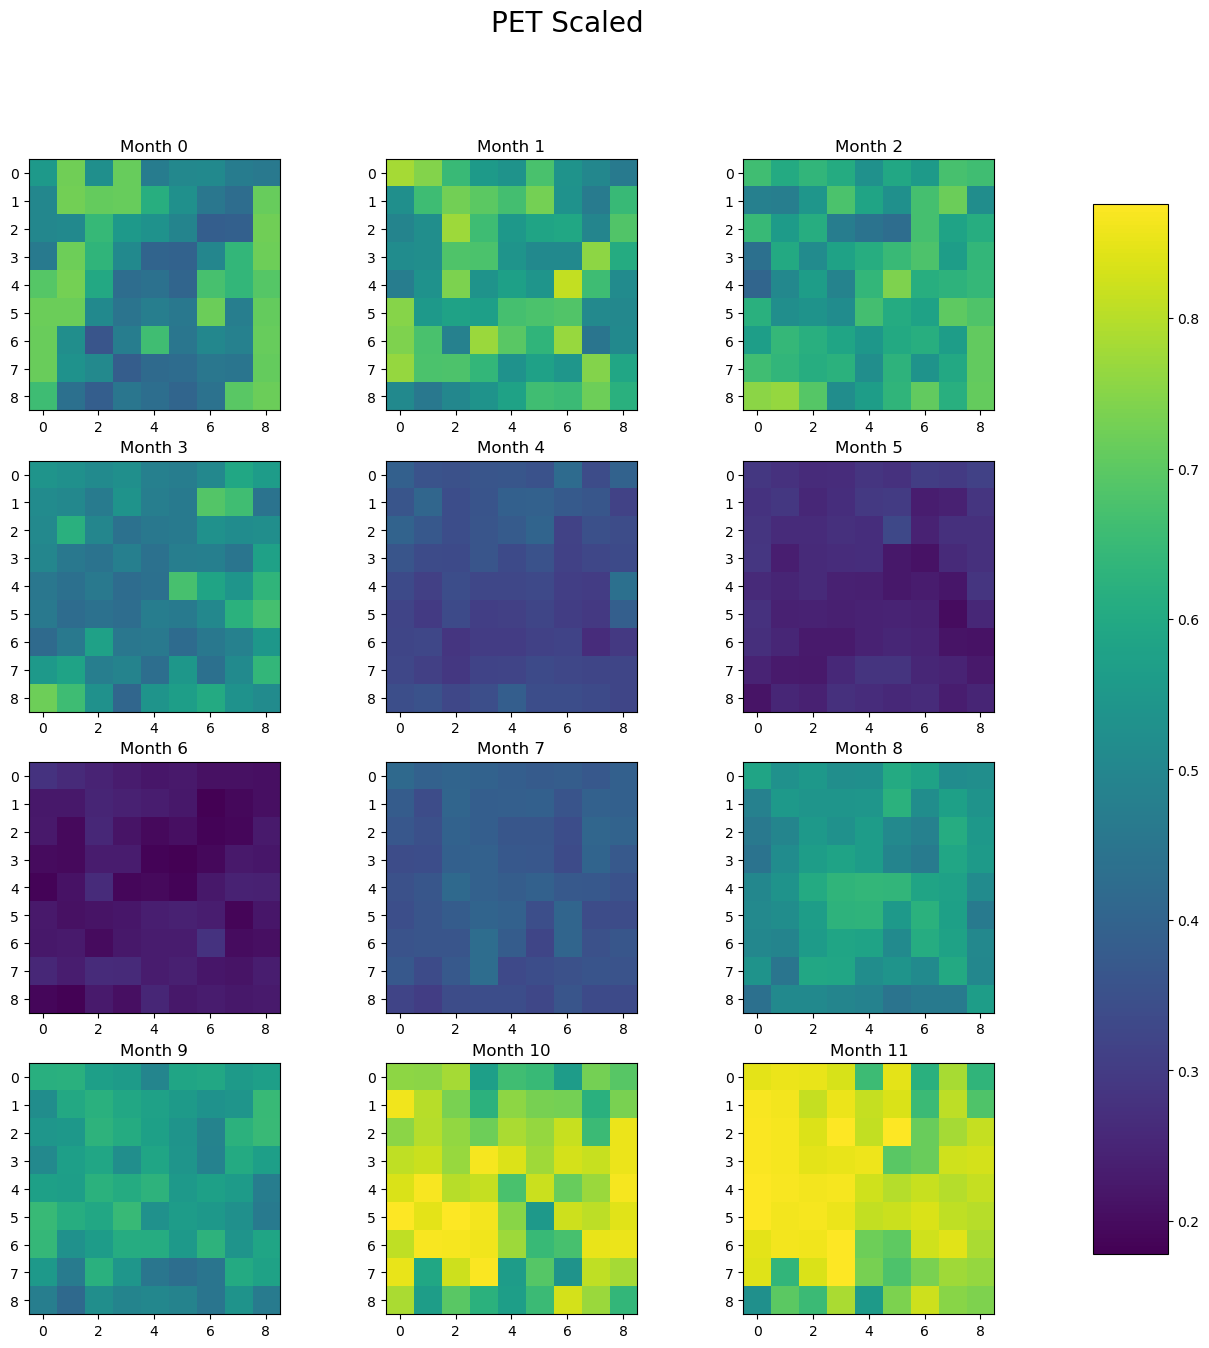

In [62]:
min = torch.min(data['PET_scaled']).item()
max = torch.max(data['PET_scaled']).item()
print('Minimum data value:', min)
print('Maximum data value:', max)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, a11, ax12)) = plt.subplots(4, 3, figsize=(15,15))
fig.suptitle('PET Scaled', fontsize=20)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, a11, ax12]
for i in range(12):
    im = axes[i].imshow(data['PET_scaled'][0, i, :, :], vmin=min, vmax=max)
    axes[i].set_title('Month '+str(i))
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

### Precip Scaled

*This is an R array object with four dimensions (number of observations, 12, 9, 9). The values in the array are normalised precipitation for a 9 x 9 patch of pixels over the preceding 12 months, and centred around the groundwater observation. Each pixel is 1500m x 1500m. We can basically think of this as a tensor containing 9x9 pixel images with 12 channels.*


In [63]:
print(data['precip_scaled'].shape)

torch.Size([1, 12, 9, 9])


Minimum data value: 0.0015853842487558722
Maximum data value: 0.39317530393600464


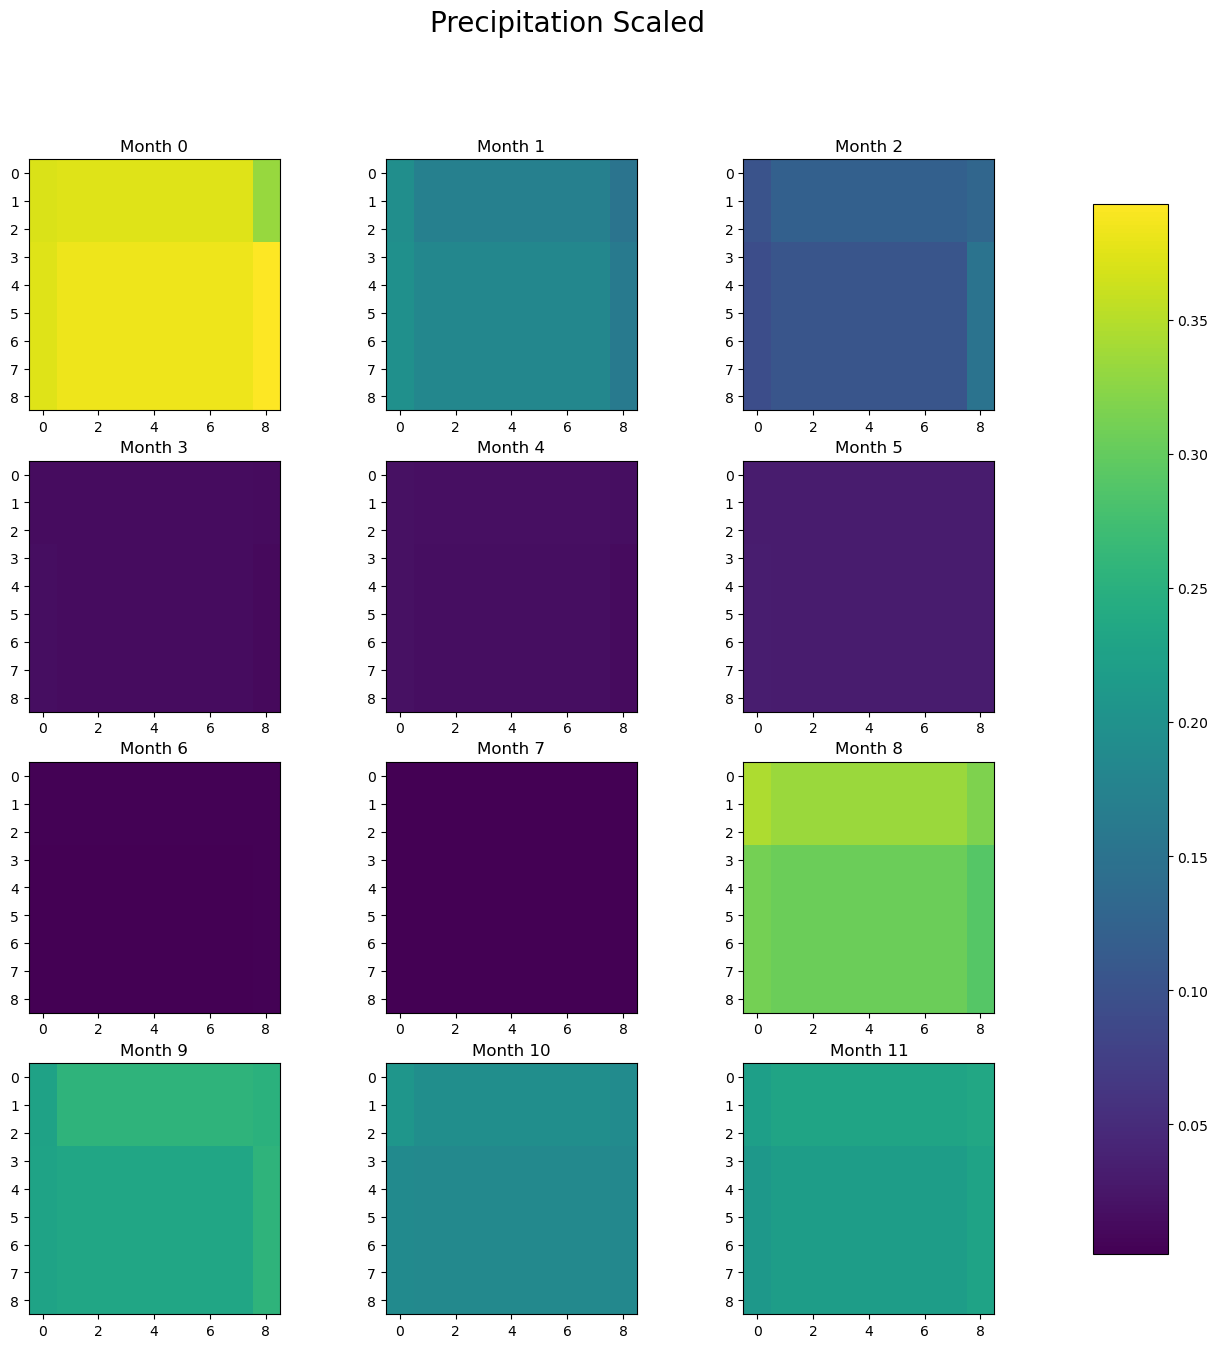

In [64]:
min = torch.min(data['precip_scaled']).item()
max = torch.max(data['precip_scaled']).item()
print('Minimum data value:', min)
print('Maximum data value:', max)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, a11, ax12)) = plt.subplots(4, 3, figsize=(15,15))
fig.suptitle('Precipitation Scaled', fontsize=20)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, a11, ax12]
for i in range(12):
    im = axes[i].imshow(data['precip_scaled'][0, i, :, :], vmin=min, vmax=max)
    axes[i].set_title('Month '+str(i))
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

### Groundwater Depth (GW Depth)

*Each entry contains the observed groundwater depth (in metres) at a well at a particular point in time. This is a numeric vector object type, with length equal to the number of observations in the training set.*

In [65]:
print(data['GW_depth'].shape)

torch.Size([1])


In [66]:
print(data['GW_depth'])

tensor([6.2400])


### Year Scaled

*This is a numeric matrix with a single column. Each row corresponds to a groundwater observation and the single column contains the calendar year (using the range of values in the training set).*

In [67]:
print(data['year_scaled'].shape)

torch.Size([1, 1])


In [68]:
print(data['year_scaled'])

tensor([[0.5484]])


### DEM Scaled

*This is an R array object with four dimensions (number of observations, 1, 9, 9). The values in the array are normalised elevations for a 9 x 9 patch of pixels, centred around the groundwater observation. Each pixel is 1500m x 1500m. We can basically think of this as a tensor containing 9x9 pixel images with only 1 channel.*

In [69]:
print(data['DEM_scaled'].shape)

torch.Size([1, 1, 9, 9])


Minimum data value: 0.4811320900917053
Maximum data value: 0.5542452931404114


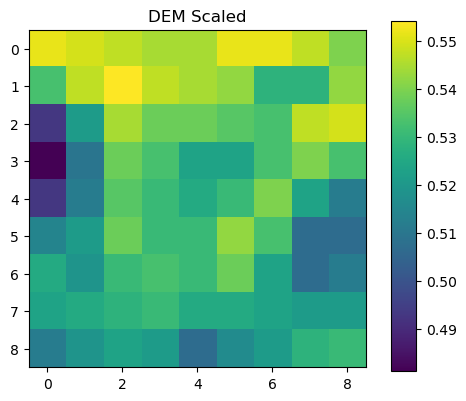

In [70]:
min = torch.min(data['DEM_scaled']).item()
max = torch.max(data['DEM_scaled']).item()
print('Minimum data value:', min)
print('Maximum data value:', max)

fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.imshow(data['DEM_scaled'][0, 0, :, :])
ax.set_title('DEM Scaled')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

### Coordinates Scaled

*This is a numeric matrix where each row corresponds to each groundwater observation and the columns are the normalised (using the range of values in the training set) latitude and longitude.*

In [71]:
print(data['coordinates_scaled'].shape)

torch.Size([1, 2])


In [72]:
print(data['coordinates_scaled'])

tensor([[0.0650, 0.3581]])
